# **Image Classifier Project**
by Tycho De Saeytyd

In this project, we are going to create a model that will try to predict the names of people that are on a given image. First we will feed this model 115 training images of each person to learn and thereafter we will let the model predict some new images.

# Importing the required libraries

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Here I mount my Google Drive to use the files stored in My Drive

In [93]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Collecting the dataset

I have two directories in the main directory 'Friends', namely 'train' and 'validation'. In each of those folders, there are subfolders named after the persons I use for this project.

In [0]:
main_dir = os.path.join('/content/drive/My Drive/Project', 'Friends')
train_dir = os.path.join('/content/drive/My Drive/Project/Friends', 'train')
validation_dir = os.path.join('/content/drive/My Drive/Project/Friends', 'validation')

train_catoo_dir = os.path.join(train_dir, 'Catoo')  # directory with the training pictures of Catoo
train_nicolas_dir = os.path.join(train_dir, 'Nicolas')  # directory with the training pictures of Nicolas
train_juan_dir = os.path.join(train_dir, 'Juan')  # directory with the training pictures of Juan
train_olivier_dir = os.path.join(train_dir, 'Olivier')  # directory with the training pictures of Olivier
train_oskar_dir = os.path.join(train_dir, 'Oskar')  # directory with the training pictures of Oskar
train_matthew_dir = os.path.join(train_dir, 'Matthew')  # directory with the training pictures of Matthew



validation_catoo_dir = os.path.join(validation_dir, 'Catoo')  # directory with the vailidation pictures of Catoo
validation_nicolas_dir = os.path.join(validation_dir, 'Nicolas')  # directory with the vailidation pictures of Nicolas
validation_juan_dir = os.path.join(validation_dir, 'Juan')  # directory with the vailidation pictures of Juan
validation_olivier_dir = os.path.join(validation_dir, 'Olivier')  # directory with the vailidation pictures of Olivier
validation_oskar_dir = os.path.join(validation_dir, 'Oskar')  # directory with the vailidation pictures of Oskar
validation_matthew_dir = os.path.join(validation_dir, 'Matthew')  # directory with the vailidation pictures of Matthew


Here we can see how many training and validation images are present in the dataset.

In [95]:
num_catoo_tr = len(os.listdir(train_catoo_dir)) # number of images in train directory Catoo
num_nicolas_tr = len(os.listdir(train_nicolas_dir)) # number of images in train directory Nicolas
num_juan_tr = len(os.listdir(train_juan_dir)) # number of images in train directory Juan
num_olivier_tr = len(os.listdir(train_olivier_dir)) # number of images in train directory Olivier
num_oskar_tr = len(os.listdir(train_oskar_dir)) # number of images in train directory Oskar
num_matthew_tr = len(os.listdir(train_matthew_dir)) # number of images in train directory Matthew

num_catoo_val = len(os.listdir(validation_catoo_dir)) # number of images in validation directory Catoo
num_nicolas_val = len(os.listdir(validation_nicolas_dir)) # number of images in validation directory Nicolas
num_juan_val = len(os.listdir(validation_juan_dir)) # number of images in validation directory Juan
num_olivier_val = len(os.listdir(validation_olivier_dir)) # number of images in validation directory Olivier
num_oskar_val = len(os.listdir(validation_oskar_dir)) # number of images in validation directory Oskar
num_matthew_val = len(os.listdir(validation_matthew_dir)) # number of images in validation directory Matthew


total_train = num_catoo_tr + num_nicolas_tr + num_juan_tr + num_olivier_tr + num_oskar_tr + num_matthew_tr
total_val = num_catoo_val + num_nicolas_val + num_juan_val + num_olivier_val + num_oskar_val + num_matthew_val

print("Total training images:", total_train) # print the total number of training images
print("Total validation images:", total_val) # print the total number of validation images

Total training images: 690
Total validation images: 210


## Number of images for each person

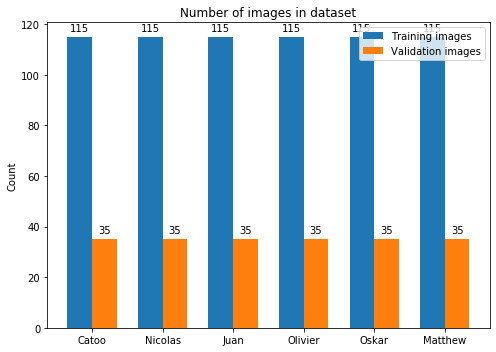

In [0]:
names = ['Catoo', 'Nicolas', 'Juan', 'Olivier', 'Oskar', 'Matthew']
valuesTrain = [num_catoo_tr, num_nicolas_tr, num_juan_tr, num_olivier_tr, num_oskar_tr, num_matthew_tr]
valuesVal = [num_catoo_val, num_nicolas_val, num_juan_val, num_olivier_val, num_oskar_val, num_matthew_val]

x = np.arange(len(names))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(7,5))
barTrain = ax.bar(x - width/2, valuesTrain, width, label='Training images')
barVal = ax.bar(x + width/2, valuesVal, width, label='Validation images')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # 4 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barTrain)
autolabel(barVal)
ax.legend()
ax.set_ylabel('Count')
ax.set_title('Number of images in dataset')
ax.set_xticks(x)
ax.set_xticklabels(names)

fig.tight_layout()
plt.show()

As you can see, we have exactly 150 pictures for every person in this dataset. 115 training images and 35 validation images.

# Building the data generators

In [0]:
batch_size = 35 # total number of training images present in one batch
epochs = 20 # number of times that the entire dataset is passed forward and backward through the neural network once
IMG_HEIGHT = 150 # we crop all the images to a height of 150 pixels
IMG_WIDTH = 150 # we crop all the images to a width of 150 pixels

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for the training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for the validation data

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 690 images belonging to 6 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 210 images belonging to 6 classes.


# Visualizing some of the images of our dataset

Before we start building the model, let's have a look at some of our images. We want to make sure that they are mixed up and in the right size and color.

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in a grid with 1 row and 5 columns
def makePlot(images,count):
    fig, axes = plt.subplots(1, count, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

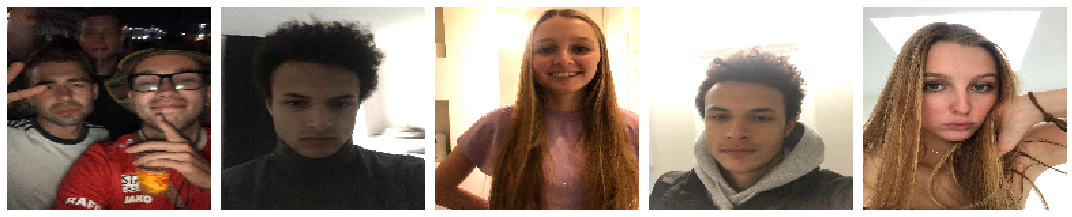

In [0]:
makePlot(sample_training_images[:5],5)

# Build the model

Now it is time to build the actual model. We will create 10 layers in total.

In [0]:
model = Sequential([
    Conv2D(16, 5, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, 5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, 5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

## Compiling the model

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

## Summary of the different layers of our convolutional network

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      1216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
19/19 [==============================] - 147s 8s/step - loss: 1.7198 - acc: 0.3414 - val_loss: 1.3564 - val_acc: 0.5476
Epoch 2/20
19/19 [==============================] - 145s 8s/step - loss: 0.7616 - acc: 0.7302 - val_loss: 0.8455 - val_acc: 0.7333
Epoch 3/20
19/19 [==============================] - 145s 8s/step - loss: 0.3854 - acc: 0.8458 - val_loss: 1.0112 - val_acc: 0.7238
Epoch 4/20
19/19 [==============================] - 143s 8s/step - loss: 0.3290 - acc: 0.8763 - val_loss: 1.0450 - val_acc: 0.7381
Epoch 5/20
19/19 [==============================] - 142s 7s/step - loss: 0.2552 - acc: 0.8992 - val_loss: 0.7946 - val_acc: 0.7571
Epoch 6/20
19/19 [==============================] - 141s 7s/step - loss: 0.1751 - acc: 0.9359 - val_loss: 0.9229 - val_acc: 0.7714
Epoch 7/20
19/19 [==============================] - 136s 7s/step - loss: 0.0822 - acc: 0.9710 - val_loss: 1.2280 - val_acc: 0.7905
Epoch 8/20
19/19 [==============================] - 142s 7s/step - loss: 0.0614 - a

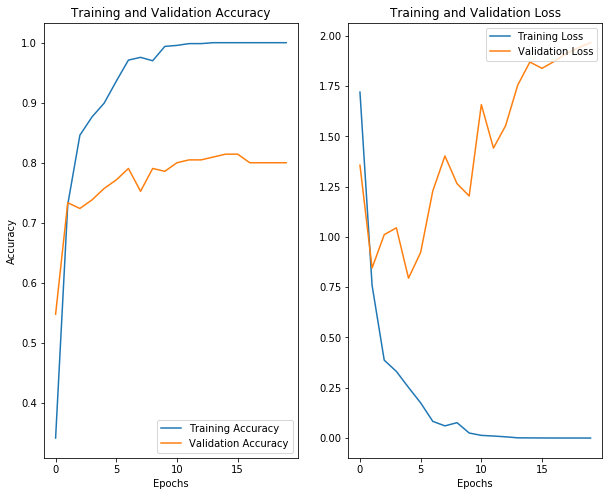

In [104]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

plt.show()

We can see that the training accuracy reaches the maximum of 100%, while the validation accuracy stagnates around 80% when increasing the number of epochs. The training loss reaches the minimum of 0, while the validation loss actually goes up when we increase the number of epochs.

In [0]:
# Get the accuracy of the validation data
print(model.metrics_names)
model.evaluate(val_data_gen)

['loss', 'acc']
1/6 [====>.........................] - ETA: 25s - loss: 1.7719 - acc: 0.8000

KeyboardInterrupt: ignored

# Prediction of new images

Now let's predict the new names of some fresh images. 

In [96]:
from tensorflow.keras.preprocessing import image
import glob
test_images = [] #make a new array 
for filename in glob.glob(main_dir + '/test/*.png'): #upload all of the images in the subfolder called test
    im=image.load_img(filename, target_size=(IMG_WIDTH, IMG_HEIGHT)) 
    test_images.append(im) #add every loaded image to the array test_images

print(len(test_images))

10


In this cell, I first load the image, than turn it in a numpy array. Next I'll add an extra dimension so that the image can be used with our model. Last but not least I make a prediction about the image. I used some if/elif statements to change the predicted number into an actual name.

In [0]:
from tensorflow.keras.preprocessing import image

names = [] #make a new array
for i in range(len(test_images)): 
  img = test_images[i]
  x = img
  x = np.expand_dims(x, axis=0)
  predictions_single = model.predict(x)
  person = np.argmax(predictions_single[0])
  if person == 0:
      person = "Catoo"
      names.append(person)
  elif person == 1:
      person = "Juan"
      names.append(person)
  elif person == 2:
      person = "Matthew"
      names.append(person)
  elif person == 3:
      person = "Nicolas"
      names.append(person)
  elif person == 4:
      person = "Olivier"
      names.append(person)
  elif person == 5:
      person = "Oskar"
      names.append(person)

In [0]:
def makePlot2(images,count):
    fig, axes = plt.subplots(1, count, figsize=(15,15))
    axes = axes.flatten()
    i = 0
    for img, ax in zip( images, axes):
        ax.imshow(img) #show the image
        ax.set_title(names[i]) #as a title I use the name of the predicted person
        ax.axis('off') #we turn the axis off
        i=i+1
    plt.tight_layout()
    plt.show()

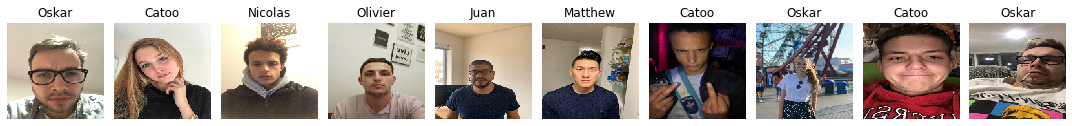

In [103]:
number_of_pictures = len(test_images) # we want to show as many pictures as there are in the test_images array
makePlot2(test_images[:],number_of_pictures)

As you can see, we are able to predict all of the names of the persons on the new images. It is easy to add new pictures to the folder "test" and let the model predict the persons' names.